In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

## Modelagem

In [ ]:
x = np.random.randn(1024)

In [ ]:
numtaps = 16
f = 0.25
b= signal.firwin(numtaps, f)

In [ ]:
w, h_orig = signal.freqz(b)

fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h_orig)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

In [ ]:
d = signal.convolve(x, b, mode='full')

In [8]:
def lms(x,d,delta,N):
    M=len(x)
    y=np.zeros(M) #Cria o array de saida
    e=np.zeros(M) #Cria o array de erro
    h=np.zeros(N) #Inicializa o filtro FIR

    for n in range(N,M):
        x_aux= x[n-N:n]
        y[n] = sum(h*x_aux)
        e[n] = d[n]-y[n]
        h = h + 2*delta*e[n]*x_aux
    
    return [h, y, e]

In [ ]:
[h,y,e]= lms(x,d,0.01,16)

In [ ]:
#%matplotlib qt
fig = plt.figure()
plt.title('Error')
ax1 = fig.add_subplot(111)
plt.plot(np.abs(e**2) ,'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

In [ ]:
w, h = signal.freqz(h)

fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.plot(w, 20 * np.log10(abs(h_orig)), 'r')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

## Cancelamento de Interferências

In [2]:
n = np.arange(1024)
sinal=np.cos(2*np.pi*n/128)

Text(0.5, 1.0, 'Sinusoidal with white noise')

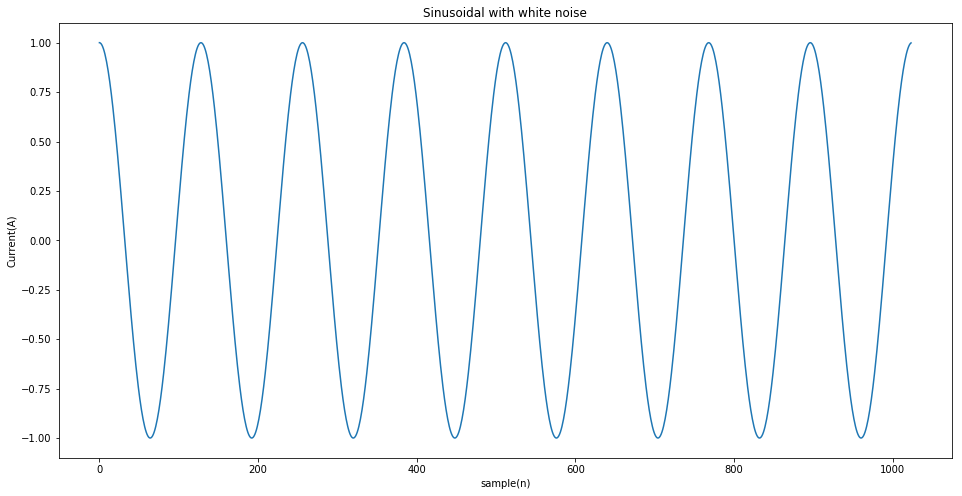

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
ax.plot(sinal)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

In [9]:
x=np.sin(2*np.pi*n/32)
numtaps = 16
f = 0.5
b= signal.firwin(numtaps, f)
ruido = signal.convolve(x, b, mode='same')
d=sinal+ruido

Text(0.5, 0, 'Frequency [rad/sample]')

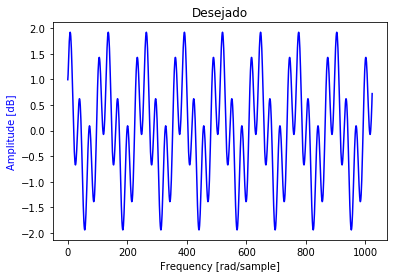

In [10]:
fig = plt.figure()
plt.title('Desejado')
ax1 = fig.add_subplot(111)
plt.plot(d ,'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

In [11]:
[h,y,e]=lms(x,d,0.001,64)

Text(0.5, 0, 'Frequency [rad/sample]')

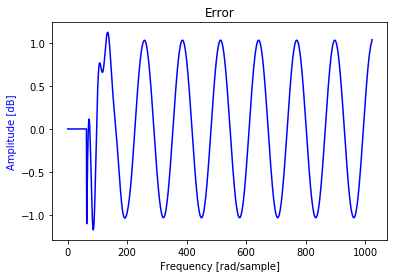

In [12]:
fig = plt.figure()
plt.title('Error')
ax1 = fig.add_subplot(111)
plt.plot(e ,'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')